Name: *Yash Bankar*
Roll: 78
Class: BE(IT)
Subject:LP-IV(DL)


In [2]:
import tensorflow as tf
print(tf.__version__)

2023-09-15 08:33:19.176395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


In [5]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD 
import numpy as np 
import random
import matplotlib.pyplot as plt

In [6]:
import os
os.environ['CUDA _VISIBLE DEVICES'] ='-1'

In [7]:
x_train = np.loadtxt('input.csv',delimiter =',')
y_train = np.loadtxt ('labels.csv',delimiter =',') 

In [8]:
x_test = np.loadtxt('input_test.csv', delimiter =',')
y_test = np.loadtxt('labels_test.csv', delimiter =',')

In [9]:
x_train = x_train.reshape (len (x_train), 100, 100, 3)
y_train = y_train.reshape (len(y_train), 1) 

In [10]:
x_test = x_test . reshape(len(x_test),100, 100,3)
y_test = y_test. reshape (len(y_test), 1)

In [11]:
x_train = x_train/255.0
x_test=x_test/255.0 

In [12]:
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape) 


Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (400, 100, 100, 3)
Shape of X_train: (400, 1)


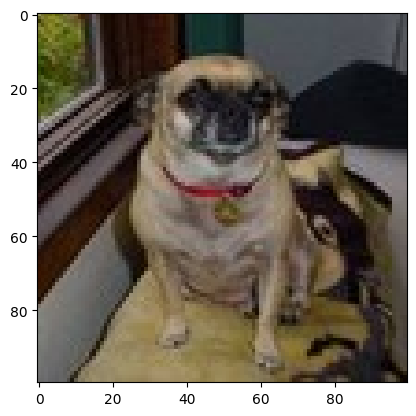

In [13]:
idx = random.randint(0, len(x_train)) 
plt.imshow(x_train[idx, :]) 
plt.show() 

In [14]:
from tensorflow.keras.layers import BatchNormalization

In [15]:
model = Sequential([
        Conv2D(256, (3,3) , activation = 'relu', input_shape=(100, 100, 3)), 
        BatchNormalization(),
        MaxPooling2D((4, 4)), Conv2D(128, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid') 
    ])

2023-09-15 08:35:29.408795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy']) 

In [17]:
model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
63/63 [==============================] - 91s 1s/step - loss: 0.8118 - accuracy: 0.5440 - val_loss: 0.7335 - val_accuracy: 0.5050
Epoch 2/10
63/63 [==============================] - 94s 1s/step - loss: 0.6582 - accuracy: 0.6115 - val_loss: 0.7352 - val_accuracy: 0.4975
Epoch 3/10
63/63 [==============================] - 106s 2s/step - loss: 0.6236 - accuracy: 0.6540 - val_loss: 0.8260 - val_accuracy: 0.5175
Epoch 4/10
63/63 [==============================] - 83s 1s/step - loss: 0.5994 - accuracy: 0.6855 - val_loss: 0.7476 - val_accuracy: 0.5400
Epoch 5/10
63/63 [==============================] - 87s 1s/step - loss: 0.5591 - accuracy: 0.7065 - val_loss: 0.8616 - val_accuracy: 0.5475
Epoch 6/10
63/63 [==============================] - 83s 1s/step - loss: 0.5281 - accuracy: 0.7230 - val_loss: 0.6982 - val_accuracy: 0.6025
Epoch 7/10
63/63 [==============================] - 84s 1s/step - loss: 0.5090 - accuracy: 0.7530 - val_loss: 0.6522 - val_accuracy: 0.6400
Epoch 8/10
63/63 [=

In [18]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 5s 367ms/step - loss: 0.7142 - accuracy: 0.6600


[0.7141972184181213, 0.6600000262260437]

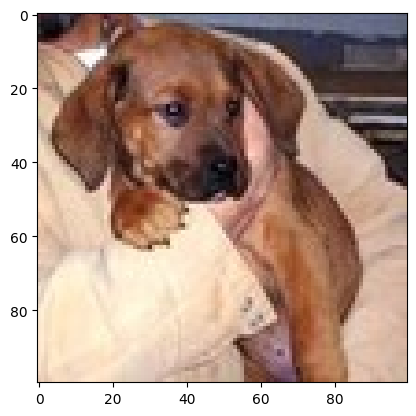

In [19]:
idx2 = random.randint(0, len(y_test)) 
plt.imshow(x_test [idx2, :]) 
plt.show()


In [20]:
y_pred=model.predict(x_test[idx2,:].reshape(1, 100,100, 3)) 
y_pred = y_pred>0.5
if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is a",pred) 

1/1 [==============================] - 0s 190ms/step
Our model says it is a dog


In [21]:
score=model.evaluate(x_test, y_test, verbose=0)
print ("Test Score: ", score[0]) 
print("Test accuracy: ", score[1]) 

Test Score:  0.7141972184181213
Test accuracy:  0.6600000262260437


In [22]:
model.summary () 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 128)      512       
 hNormalization)                                                 
                                                        

In [23]:
val = model.fit(x_train,y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
63/63 [==============================] - 98s 2s/step - loss: 0.3255 - accuracy: 0.8595 - val_loss: 0.8040 - val_accuracy: 0.6475
Epoch 2/5
63/63 [==============================] - 100s 2s/step - loss: 0.3105 - accuracy: 0.8665 - val_loss: 0.6583 - val_accuracy: 0.6850
Epoch 3/5
63/63 [==============================] - 87s 1s/step - loss: 0.2610 - accuracy: 0.8945 - val_loss: 0.7949 - val_accuracy: 0.6925
Epoch 4/5
63/63 [==============================] - 86s 1s/step - loss: 0.2218 - accuracy: 0.9070 - val_loss: 0.9873 - val_accuracy: 0.6400
Epoch 5/5
63/63 [==============================] - 86s 1s/step - loss: 0.1917 - accuracy: 0.9210 - val_loss: 0.9146 - val_accuracy: 0.6800


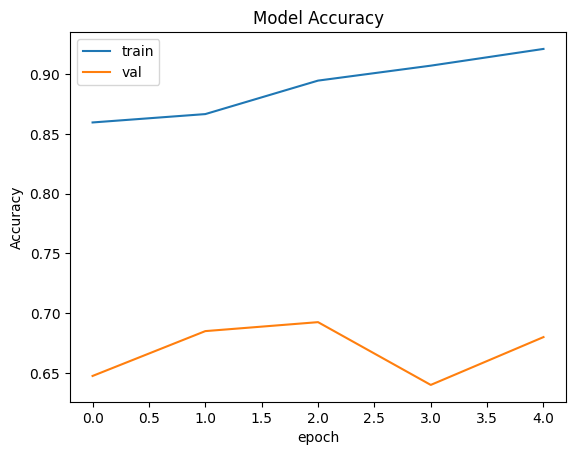

In [24]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch') 
plt.plot(val.history['accuracy']) 
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()